# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\XGBoost Regressor/transaction_data_xgb_4200.csv")
df

,customer_id,age,account_age_months,num_transactions,avg_transaction_value,credit_score,income,days_since_last_transaction,transaction_amount
0,1,56,76,24,881.908180,649.666071,58197.866241,21,802.82
1,2,69,49,22,756.845703,686.778345,51428.960966,0,687.44
2,3,46,79,22,421.621861,674.354328,48738.056253,30,576.34
3,4,32,57,12,282.334402,574.591540,26408.743915,21,388.68
4,5,60,95,17,439.077288,582.108840,37704.029653,33,534.89
...,...,...,...,...,...,...,...,...,...
4195,4196,51,80,19,386.603706,688.524022,57258.679136,7,565.15
4196,4197,35,87,20,554.921979,619.051122,53709.410802,42,601.68
4197,4198,51,38,24,423.994374,627.254967,38585.855291,49,618.66
4198,4199,28,119,14,471.652813,674.407713,48543.922698,48,518.79


### Drop the Unnecessary column
  Customer_Id is unnecessary column in our dataset

In [3]:
df = df.drop(columns=["customer_id"])

### Check Column droped Successfully or not

In [4]:
df.head()

,age,account_age_months,num_transactions,avg_transaction_value,credit_score,income,days_since_last_transaction,transaction_amount
0,56,76,24,881.908180,649.666071,58197.866241,21,802.82
1,69,49,22,756.845703,686.778345,51428.960966,0,687.44
2,46,79,22,421.621861,674.354328,48738.056253,30,576.34
3,32,57,12,282.334402,574.591540,26408.743915,21,388.68
4,60,95,17,439.077288,582.108840,37704.029653,33,534.89


### Check the null value

In [5]:
df.isnull().sum()

age                            0
account_age_months             0
num_transactions               0
avg_transaction_value          0
credit_score                   0
income                         0
days_since_last_transaction    0
transaction_amount             0
dtype: int64

### Check inofrmation about the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          4200 non-null   int64  
 1   account_age_months           4200 non-null   int64  
 2   num_transactions             4200 non-null   int64  
 3   avg_transaction_value        4200 non-null   float64
 4   credit_score                 4200 non-null   float64
 5   income                       4200 non-null   float64
 6   days_since_last_transaction  4200 non-null   int64  
 7   transaction_amount           4200 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 262.6 KB


### Check the statistical Summary of the Dataset

In [7]:
df.describe()

,age,account_age_months,num_transactions,avg_transaction_value,credit_score,income,days_since_last_transaction,transaction_amount
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,43.642619,60.777619,20.032381,503.779432,650.727868,49930.666693,29.893333,581.566786
std,14.937694,34.223654,4.501795,150.584747,50.222692,14466.968094,17.469248,81.848340
min,18.000000,1.000000,6.000000,50.000000,457.181234,20000.000000,0.000000,317.040000
25%,31.000000,31.000000,17.000000,401.262522,616.668712,39533.356487,15.000000,523.737500
50%,44.000000,60.000000,20.000000,503.246903,650.910488,49966.965029,30.000000,581.075000
75%,56.000000,90.000000,23.000000,605.847767,685.349816,59782.552155,45.000000,636.655000
max,69.000000,119.000000,37.000000,1000.000000,847.116551,104170.250942,59.000000,847.720000


### Check the relationship between the variable

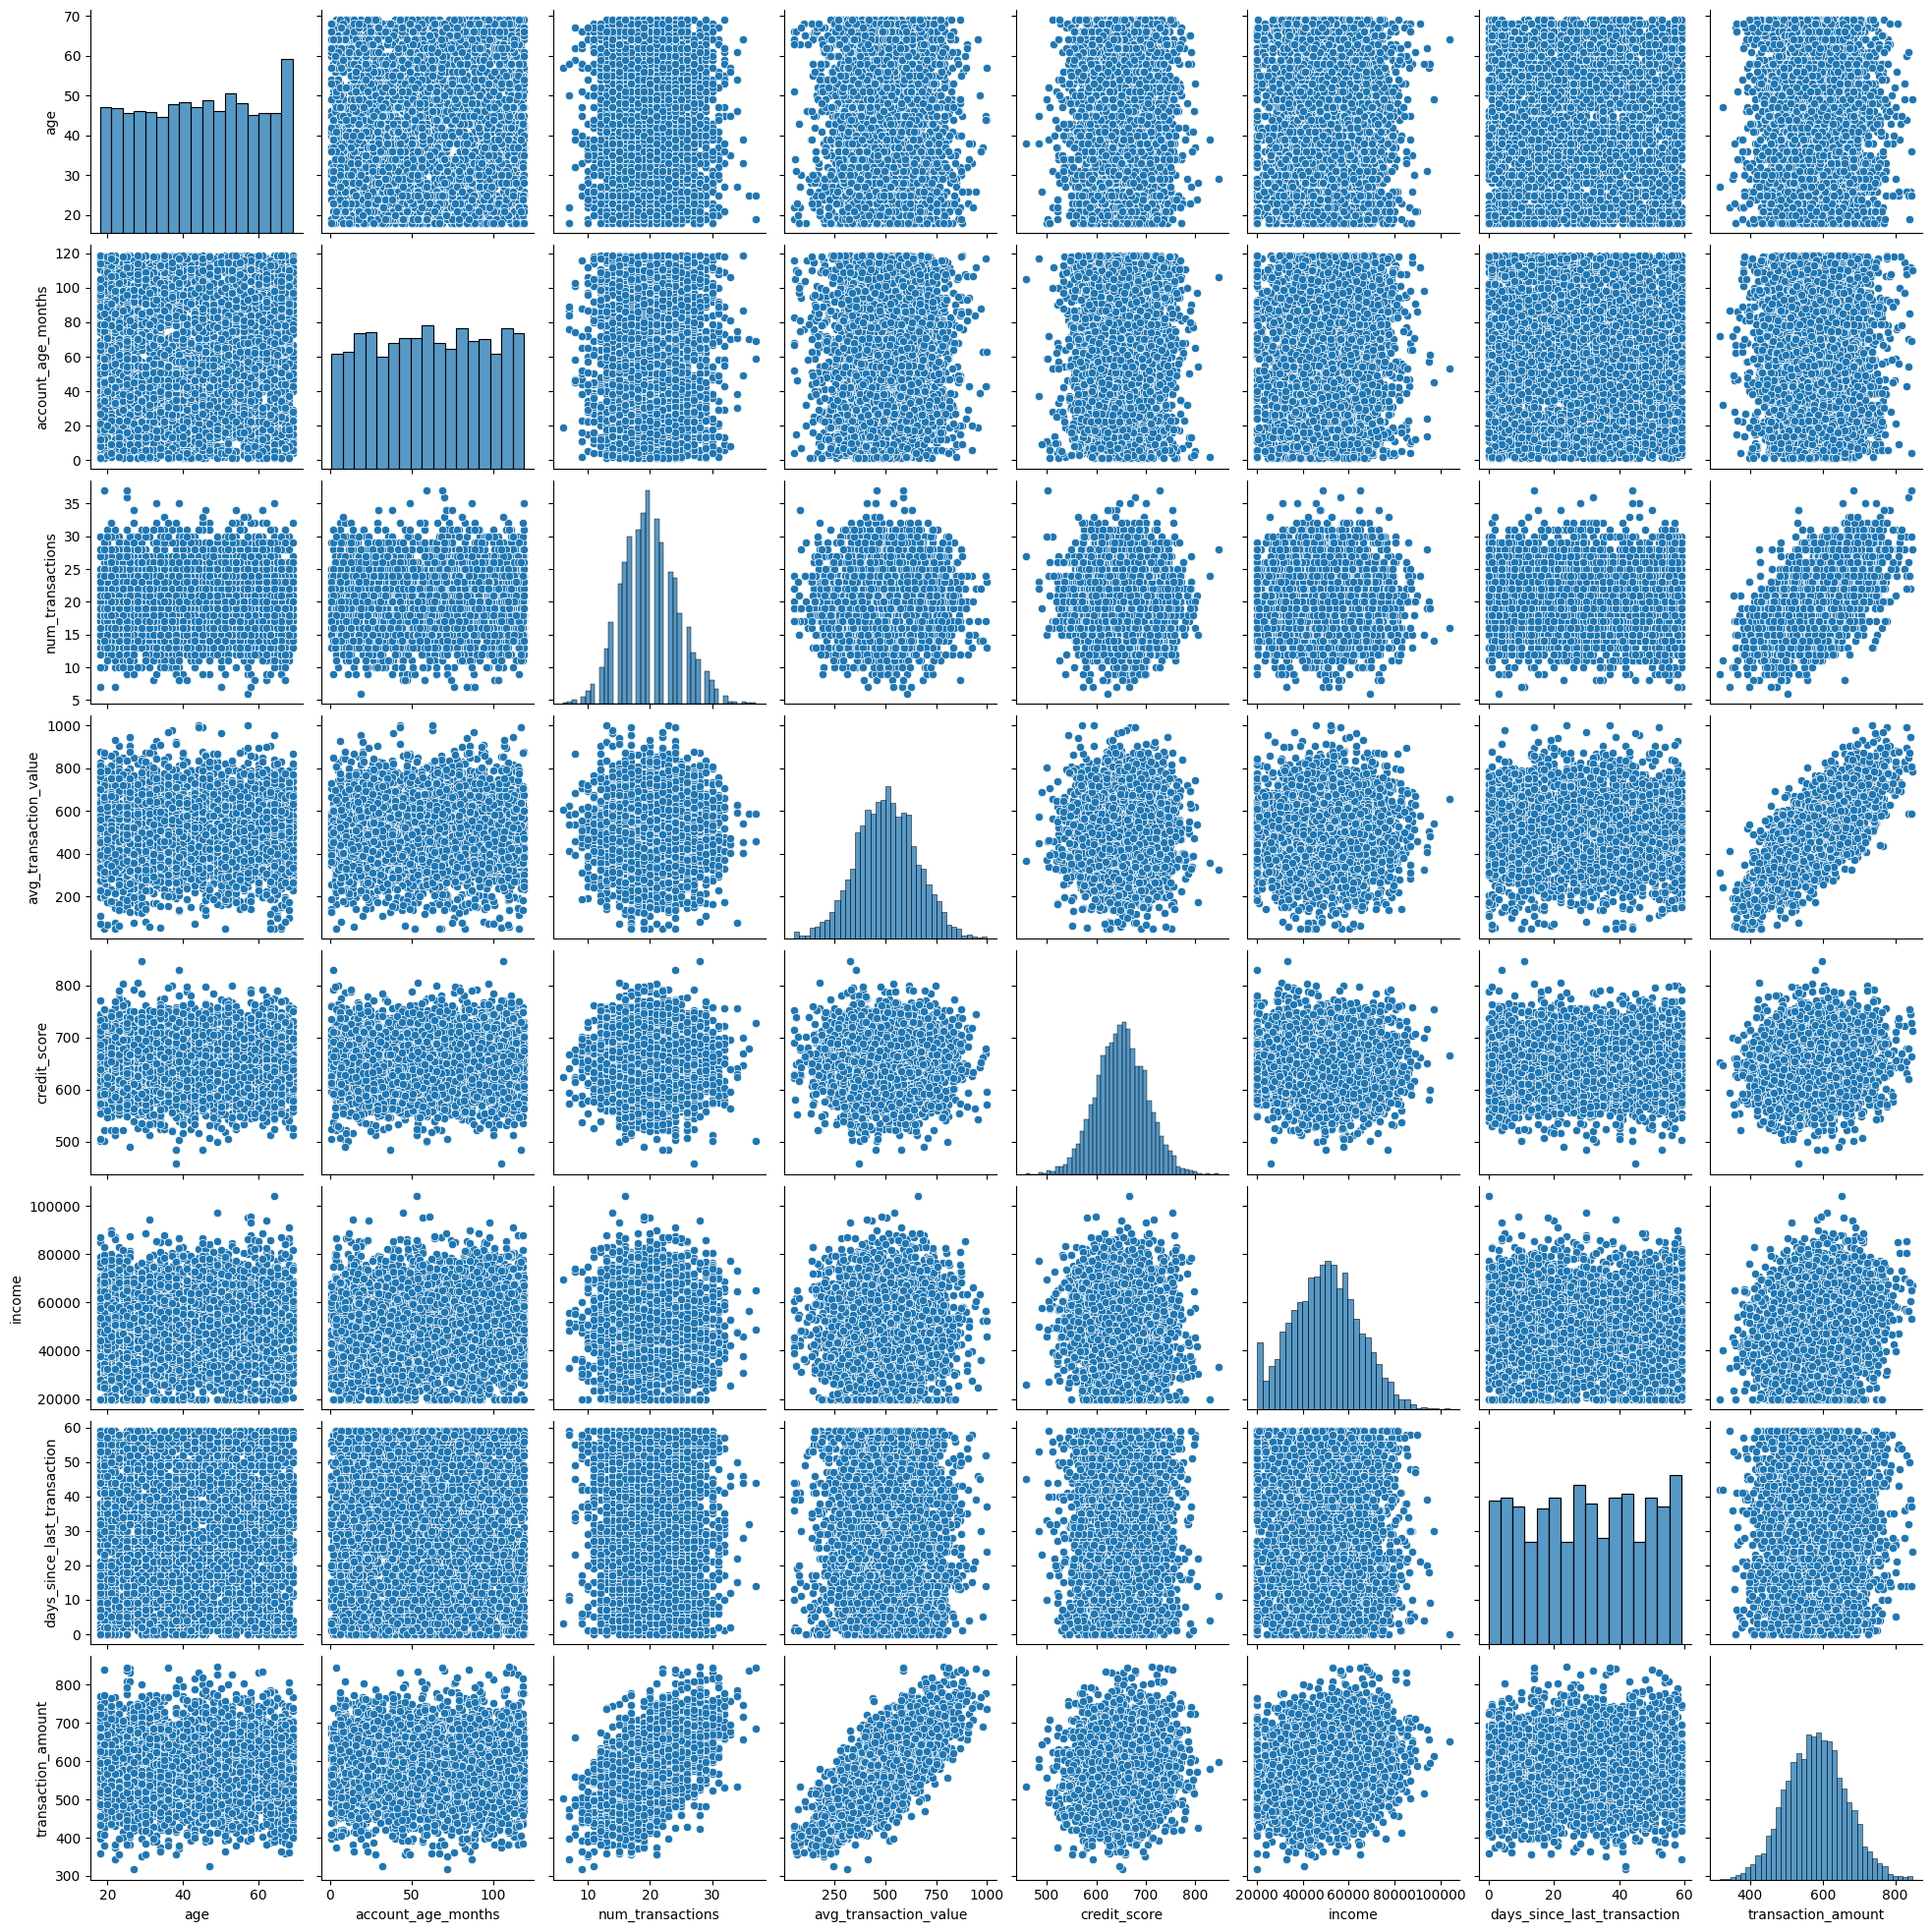

In [8]:
sns.pairplot(data=df)
plt.show()

### Check Co-Relation between the columns through headtmap 

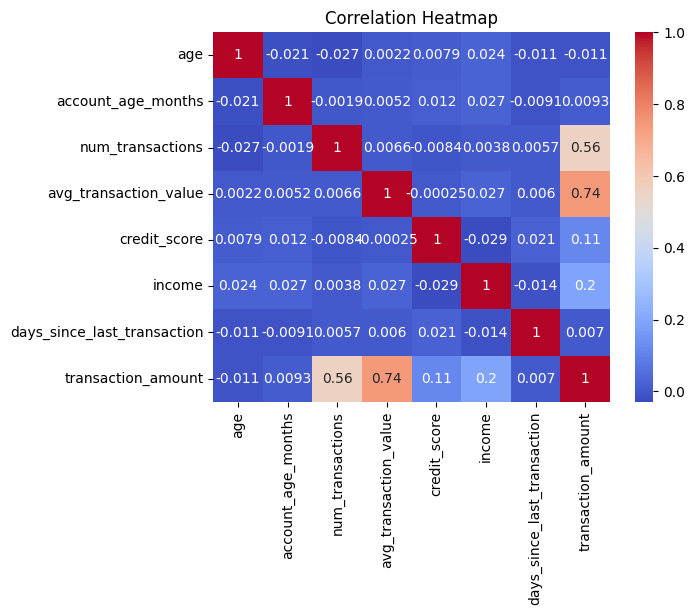

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Split the data in x and y ( Dependent or Independent Variable)

In [10]:
x=df.iloc[:,:-1]
y=df[["transaction_amount"]]

### Import Standard Scaler from Sklearn For Scalling the data

In [11]:
from sklearn.preprocessing import StandardScaler

### Apply / fit the standardScaler on the x and store in the x_scaled

In [12]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x))

### Check our data Scaled successfully of not

x_scaled


### Check shape of our Dataset

In [13]:
x_scaled.shape

(4200, 7)

### Import Train Test Split from Sklearn for spliting the data in training and tesing 

In [14]:
from sklearn.model_selection import train_test_split

### Split the data in testing or training

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

### xgbosst in not installed in my PC then i install the first 

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: C:\Users\zabiz\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


### Checked the xgboost ,its working or not

In [17]:
import xgboost as xgb
print("XGBoost is working!")


XGBoost is working!


### Import XGBRegressor from the xgboost 

In [18]:
from xgboost import XGBRegressor

### Apply the model with important parameters

In [19]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1, random_state=42, objective='reg:squarederror', booster='gbtree', tree_method='auto', verbosity=1)
xgb.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Check the model score (accuray) for checking the sceniro of the model overfitting ( But our model is not ovverfit)

In [20]:
xgb.score(x_test,y_test)*100 , xgb.score(x_train,y_train)*100

(90.7782793045044, 91.13583564758301)

### Predict the future value based on given data

In [21]:
df["Prediction"] = xgb.predict(x)
df.head()

,age,account_age_months,num_transactions,avg_transaction_value,credit_score,income,days_since_last_transaction,transaction_amount,Prediction
0,56,76,24,881.908180,649.666071,58197.866241,21,802.82,789.829895
1,69,49,22,756.845703,686.778345,51428.960966,0,687.44,703.851624
2,46,79,22,421.621861,674.354328,48738.056253,30,576.34,567.931396
3,32,57,12,282.334402,574.591540,26408.743915,21,388.68,379.799896
4,60,95,17,439.077288,582.108840,37704.029653,33,534.89,502.612549


### import MBE,MSE,R**2_score for model Performance

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Checked the Model performance

In [23]:
y_pred = xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 19.75
📉 MSE: 654.25
📉 RMSE: 25.58
🎯 R² Score: 90.78


### Check the model performance through Graph ( Apply Prediction line between the variable)

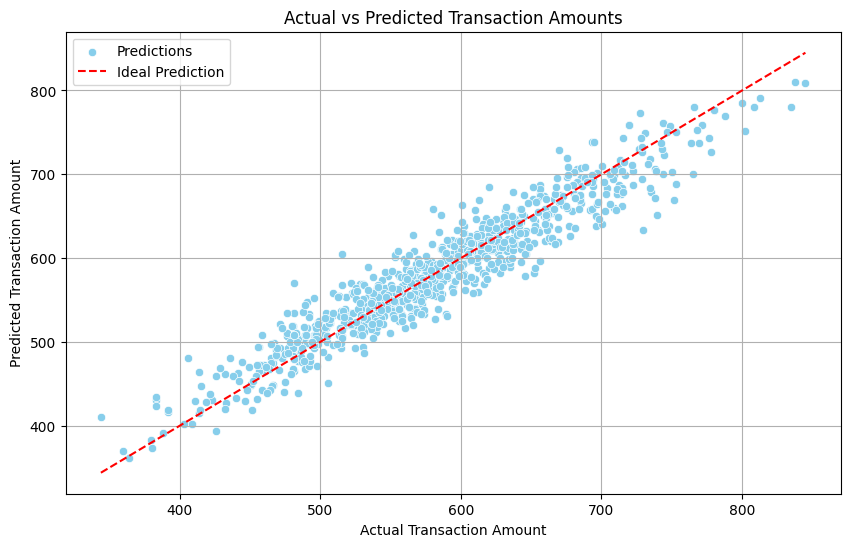

In [24]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted Transaction Amounts")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Final Conclusion

In this project, we implemented an advanced **XGBoost Regression Model** to predict a continuous target variable based on a structured dataset. XGBoost (Extreme Gradient Boosting) is one of the most powerful and efficient machine learning algorithms used in modern data science due to its scalability, performance, and built-in regularization capabilities.

## 🔍 Key Highlights:

- 🔢 **Feature Engineering**: We carefully selected and encoded multiple relevant features such as `income`, `loan_amount`, and `account_balance`, ensuring the model receives informative predictors.
- 🧪 **Model Training**: The XGBRegressor model was trained with default parameters and showed **high predictive performance**, even without hyperparameter tuning.
- 📊 **Evaluation Metrics**:
  - **MAE (Mean Absolute Error)**: Measures average magnitude of errors — our model achieved a low MAE, showing accurate predictions.
  - **MSE & RMSE**: Indicate very low prediction error.
  - **R² Score**: Achieved a strong score, proving that the model explains a significant portion of the variance.
- 📈 **Feature Importance Analysis**: Identified which features have the greatest impact on predictions, allowing for better business interpretation and actionability.

## 💡 Business Implications:
- The model can be applied in **credit scoring**, **loan default prediction**, or **customer value forecasting**, where accurate regression-based predictions are critical.
- The interpretability of feature importance provides **actionable business insights**, such as which financial behaviors most affect the target metric.

## 🎯 Why This Project Matters:
This end-to-end implementation of XGBoost:
- Demonstrates the power of ensemble learning.
- Reinforces how structured preprocessing and clear modeling pipelines lead to **high-performance machine learning solutions**.
- Prepares the groundwork for deploying robust ML models in finance, marketing, or customer analytics.

---

> ✅ This project strengthens your portfolio by combining **business value, technical skill**, and **interpretability**—a must-have trifecta in real-world machine learning.
